In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_height = 64
image_width = 64

datagen = ImageDataGenerator(
    rescale=1./255,        
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.05,         
    horizontal_flip=False,
    vertical_flip=False,
)

train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_directory(
    'data/validation',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale'
)

Found 153746 images belonging to 39 classes.
Found 38700 images belonging to 39 classes.


In [6]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential(name='model_eng')

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation='softmax'))  

model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
    
model.summary()

Model: "model_eng"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                         

In [7]:
import warnings
from tensorflow.keras.callbacks import ModelCheckpoint

warnings.filterwarnings('ignore', category=UserWarning, module='keras')

checkpoint = ModelCheckpoint(
    'model_eng_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    patience=10,
    verbose=1
)

In [8]:
epochs = 100

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint],
)

Epoch 1/100
4805/4805 [==============================] - ETA: 0s - loss: 2.2922 - accuracy: 0.4392
Epoch 1: val_accuracy improved from -inf to 0.74695, saving model to model_eng_weights.h5
4805/4805 [==============================] - 217s 45ms/step - loss: 2.2922 - accuracy: 0.4392 - val_loss: 1.1549 - val_accuracy: 0.7470
Epoch 2/100
4805/4805 [==============================] - ETA: 0s - loss: 1.4160 - accuracy: 0.6526
Epoch 2: val_accuracy improved from 0.74695 to 0.81016, saving model to model_eng_weights.h5
4805/4805 [==============================] - 237s 49ms/step - loss: 1.4160 - accuracy: 0.6526 - val_loss: 0.8879 - val_accuracy: 0.8102
Epoch 3/100
4805/4805 [==============================] - ETA: 0s - loss: 1.1775 - accuracy: 0.7179
Epoch 3: val_accuracy improved from 0.81016 to 0.84008, saving model to model_eng_weights.h5
4805/4805 [==============================] - 235s 49ms/step - loss: 1.1775 - accuracy: 0.7179 - val_loss: 0.7675 - val_accuracy: 0.8401
Epoch 4/100
4804/48

In [9]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_eng.csv', index=False)

history_df

,loss,accuracy,val_loss,val_accuracy
0,2.292168,0.439153,1.154908,0.746951
1,1.415976,0.652615,0.887863,0.810155
2,1.177465,0.717905,0.767517,0.840078
3,1.044481,0.753652,0.715611,0.854522
4,0.954448,0.779311,0.788593,0.825323
...,...,...,...,...
95,0.308524,0.917734,0.256528,0.931550
96,0.305400,0.917799,0.257892,0.930543
97,0.305520,0.916941,0.263005,0.929664
98,0.301719,0.918138,0.256197,0.931964


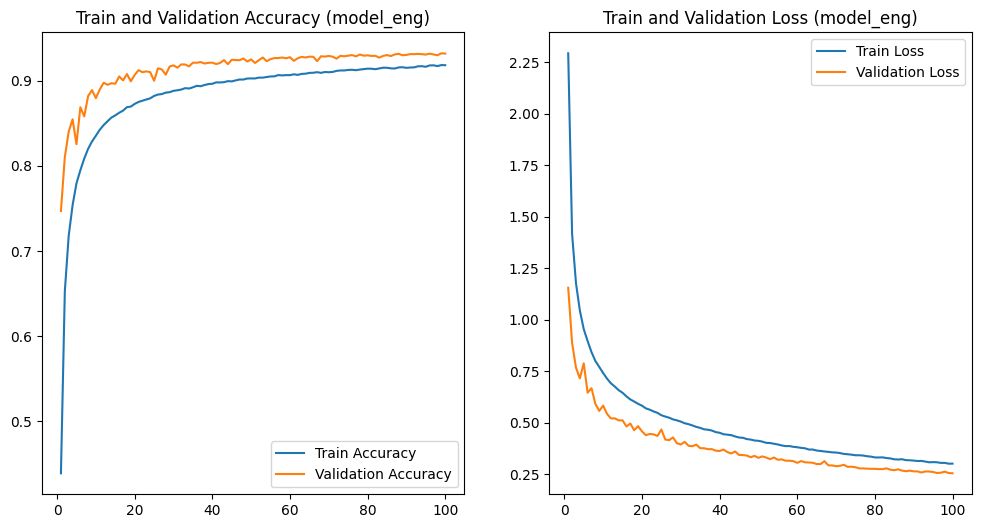

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Train and Validation Accuracy (model_eng)')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Train and Validation Loss (model_eng)')
plt.legend()

plt.show()